In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

file = open('data\\regression_data.txt','r')
text = file.readlines()
file.close()

x_data = []
y_data = []

for s in text:
    data = s.split()                                 # 공백 기준 split
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))
    
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

print("shape of input: ", x_data.shape)
print("shape of output: ", y_data.shape)

shape of input:  (100,)
shape of output:  (100,)


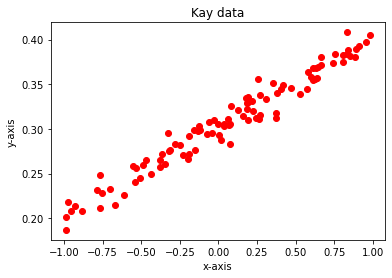

In [2]:
plt.figure(1)
plt.plot(x_data, y_data, 'ro')                      # 'ro' 는 red circle 옵션

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Kay data')

plt.show()

In [3]:
# Hyper-parameters define
input_size = 1
output_size = 1
num_epochs =100
learning_rate = 0.1

# Linear regression medel (y = wx + b)
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(x_data.shape, y_data.shape)

if len(x_data.shape) == 1 and len(y_data.shape) == 1:
    x_data = np.expand_dims(x_data, axis=-1)
    y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(100,) (100,)
(100, 1) (100, 1)


In [4]:
# train model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)
    
    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [10/100], Loss: 0.0077
Epoch [20/100], Loss: 0.0009
Epoch [30/100], Loss: 0.0003
Epoch [40/100], Loss: 0.0002
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


<function matplotlib.pyplot.show(close=None, block=None)>

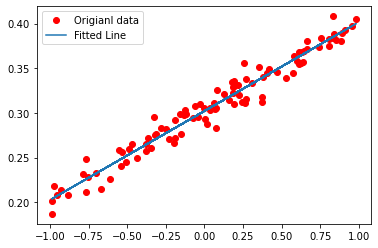

In [5]:
#print graph
predicted = model(torch.from_numpy(x_data)).detach().numpy()
plt.plot(x_data, y_data, 'ro', label='Origianl data')
plt.plot(x_data, predicted, label='Fitted Line')
plt.legend()
plt.show